# Rainfall Prediction

In [31]:
#importing required libraries

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [32]:
#Reading CSV file

df=pd.read_csv('RAINFALL.csv') 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,02-12-2008,Newcastle,NaN,32.2,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,59.0,NaN,NaN,NaN,0.0,NaN,25.4,No,No
1,03-12-2008,Newcastle,16.2,32.2,0.0,NaN,NaN,NaN,NaN,N,...,74.0,26.0,NaN,NaN,4.0,4.0,22.2,32.0,No,No
2,04-12-2008,Newcastle,19.2,24.0,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,61.0,NaN,NaN,7.0,5.0,20.4,23.0,No,No
3,05-12-2008,Newcastle,18.8,30.2,0.0,NaN,NaN,NaN,NaN,NE,...,85.0,NaN,NaN,NaN,8.0,NaN,20.0,NaN,No,No
4,06-12-2008,Newcastle,19.8,34.2,0.0,NaN,NaN,NaN,NaN,NW,...,56.0,39.0,NaN,NaN,6.0,7.0,29.2,31.8,No,No


In [33]:
df=df.drop(['Date'],axis=1)

In [34]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Preprocessing data

In [35]:
df.isnull().sum()

Location             0
MinTemp           1121
MaxTemp            939
Rainfall          1977
Evaporation      31316
Sunshine         35558
WindGustDir       5663
WindGustSpeed     5656
WindDir9am        6285
WindDir3pm        2438
WindSpeed9am      1035
WindSpeed3pm      1655
Humidity9am       1851
Humidity3pm       2261
Pressure9am      10140
Pressure3pm      10083
Cloud9am         26986
Cloud3pm         28388
Temp9am           1486
Temp3pm           1956
RainToday         1977
RainTomorrow      1975
dtype: int64

In [36]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,68327.000000,68509.000000,67471.000000,38132.000000,33890.000000,63792.000000,68413.000000,67793.000000,67597.000000,67187.000000,59308.000000,59365.000000,42462.000000,41060.000000,67962.000000,67492.000000
mean,10.881979,21.467965,2.333056,4.786098,7.036981,40.947313,13.917238,18.921983,73.063805,54.422820,1018.210231,1016.041465,4.840987,4.876206,15.148334,19.986988
std,6.008116,6.796062,7.672171,3.632649,3.850318,14.589575,9.516527,9.436317,17.476126,20.295057,7.321040,7.183818,2.834708,2.648377,5.895929,6.600168
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.700000,16.700000,0.000000,2.200000,4.000000,31.000000,7.000000,13.000000,62.000000,40.000000,1013.400000,1011.300000,2.000000,2.000000,11.000000,15.500000
50%,10.900000,21.000000,0.000000,4.000000,7.600000,39.000000,13.000000,19.000000,74.000000,54.000000,1018.300000,1016.200000,6.000000,6.000000,15.200000,19.500000
75%,15.400000,25.700000,1.000000,6.600000,10.100000,50.000000,19.000000,24.000000,87.000000,68.000000,1023.100000,1020.900000,7.000000,7.000000,19.500000,24.100000
max,31.900000,47.000000,240.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.600000,46.200000


<AxesSubplot:>

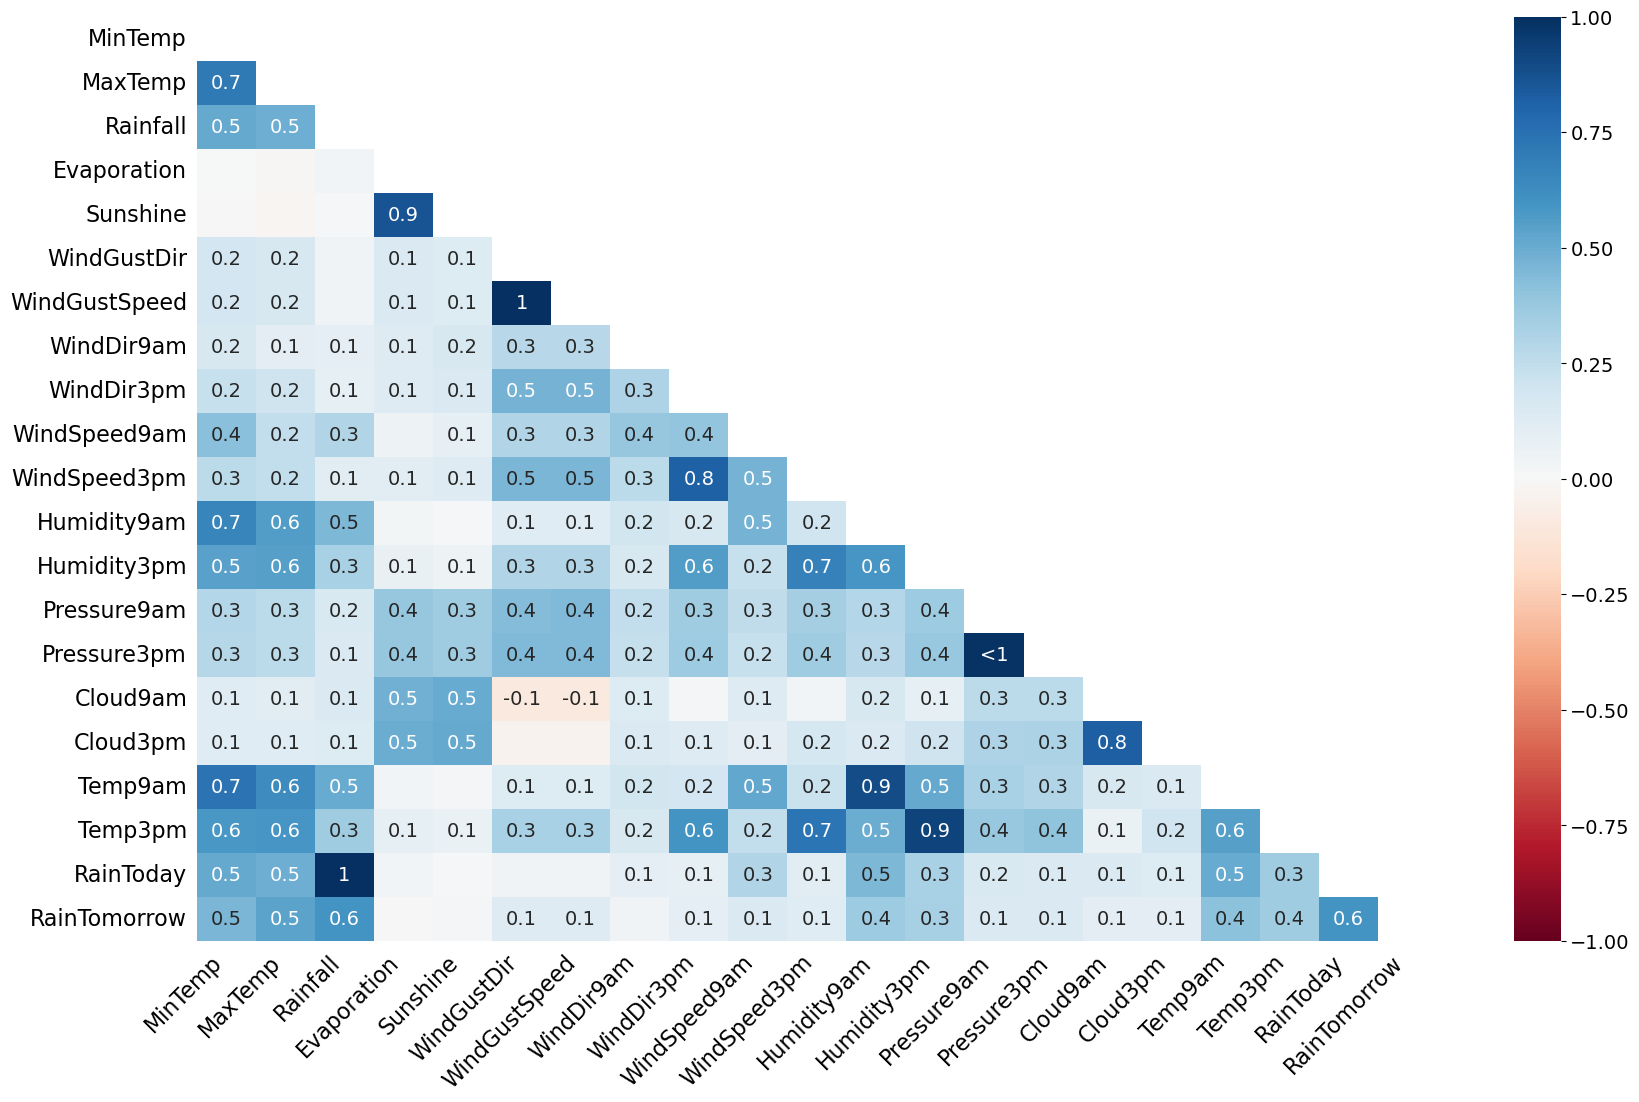

In [37]:
#missingno library of Python creates a heatmap to visualize the missing values in a pandas DataFrame.

msno.heatmap(df)

In [38]:
data=df

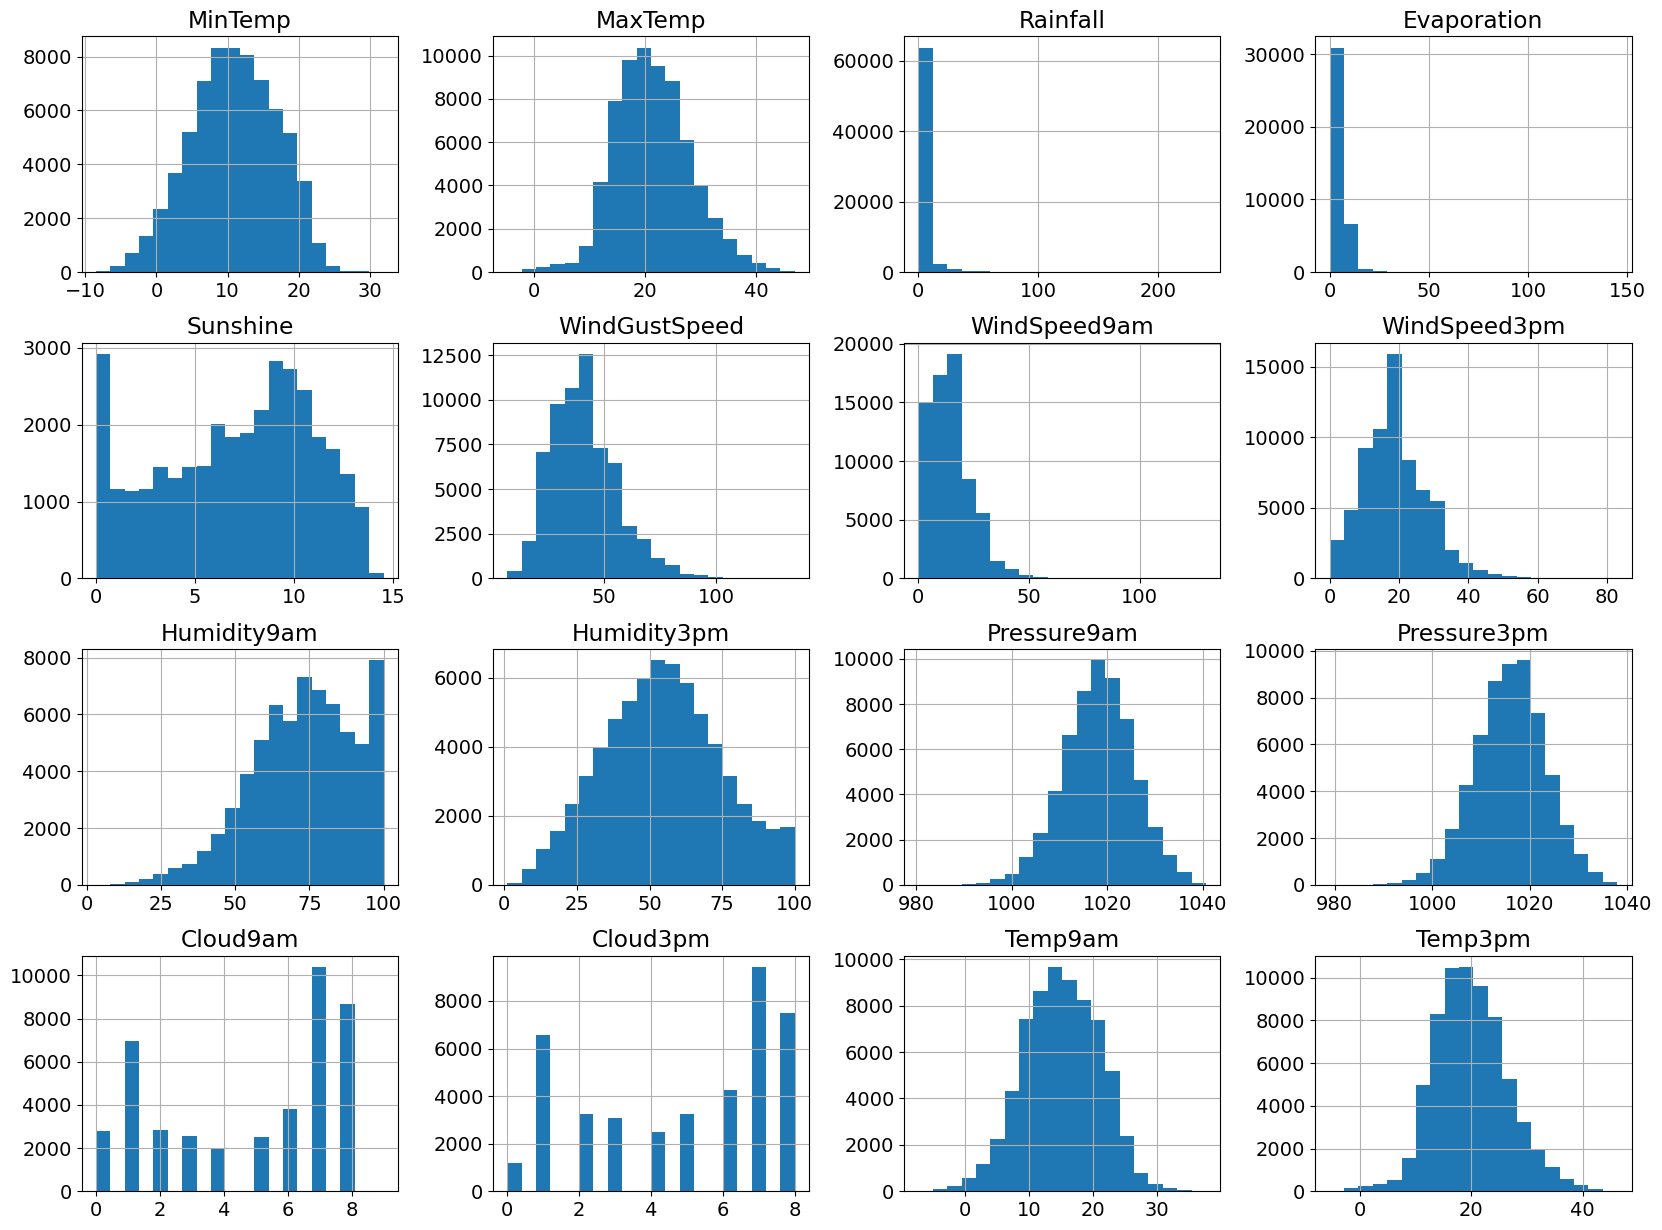

In [39]:
data.fillna(0)
data.hist(bins=20, figsize=(20, 15))
plt.show()

This Histogram is a graphical representation of the distribution of a dataset.The distribution of a dataset provides valuable insights into the underlying properties of the data. Here Min, Max Temperature, Humidity, Pressure are normally distributed while other Features are skewed towards left and right side

In [40]:
#Replacing missing values by mean for normally distributed data

df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [41]:
#replacing missing values by median for data which is highly skewed or with certain outliers 

df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())


In [42]:
#Filling the missing values for categorial data with mode

df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])


In [43]:
#Replacing Target variables with 1 and 0

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [44]:
# doing labelencder train dataset transfer into 0,1,2...
#encoding the categorical data into the DataFrame, we can use it as input to machine learning models that require numerical data.
from sklearn.preprocessing import LabelEncoder

cols = ["WindDir9am","WindDir3pm","WindGustDir"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis

<AxesSubplot:>

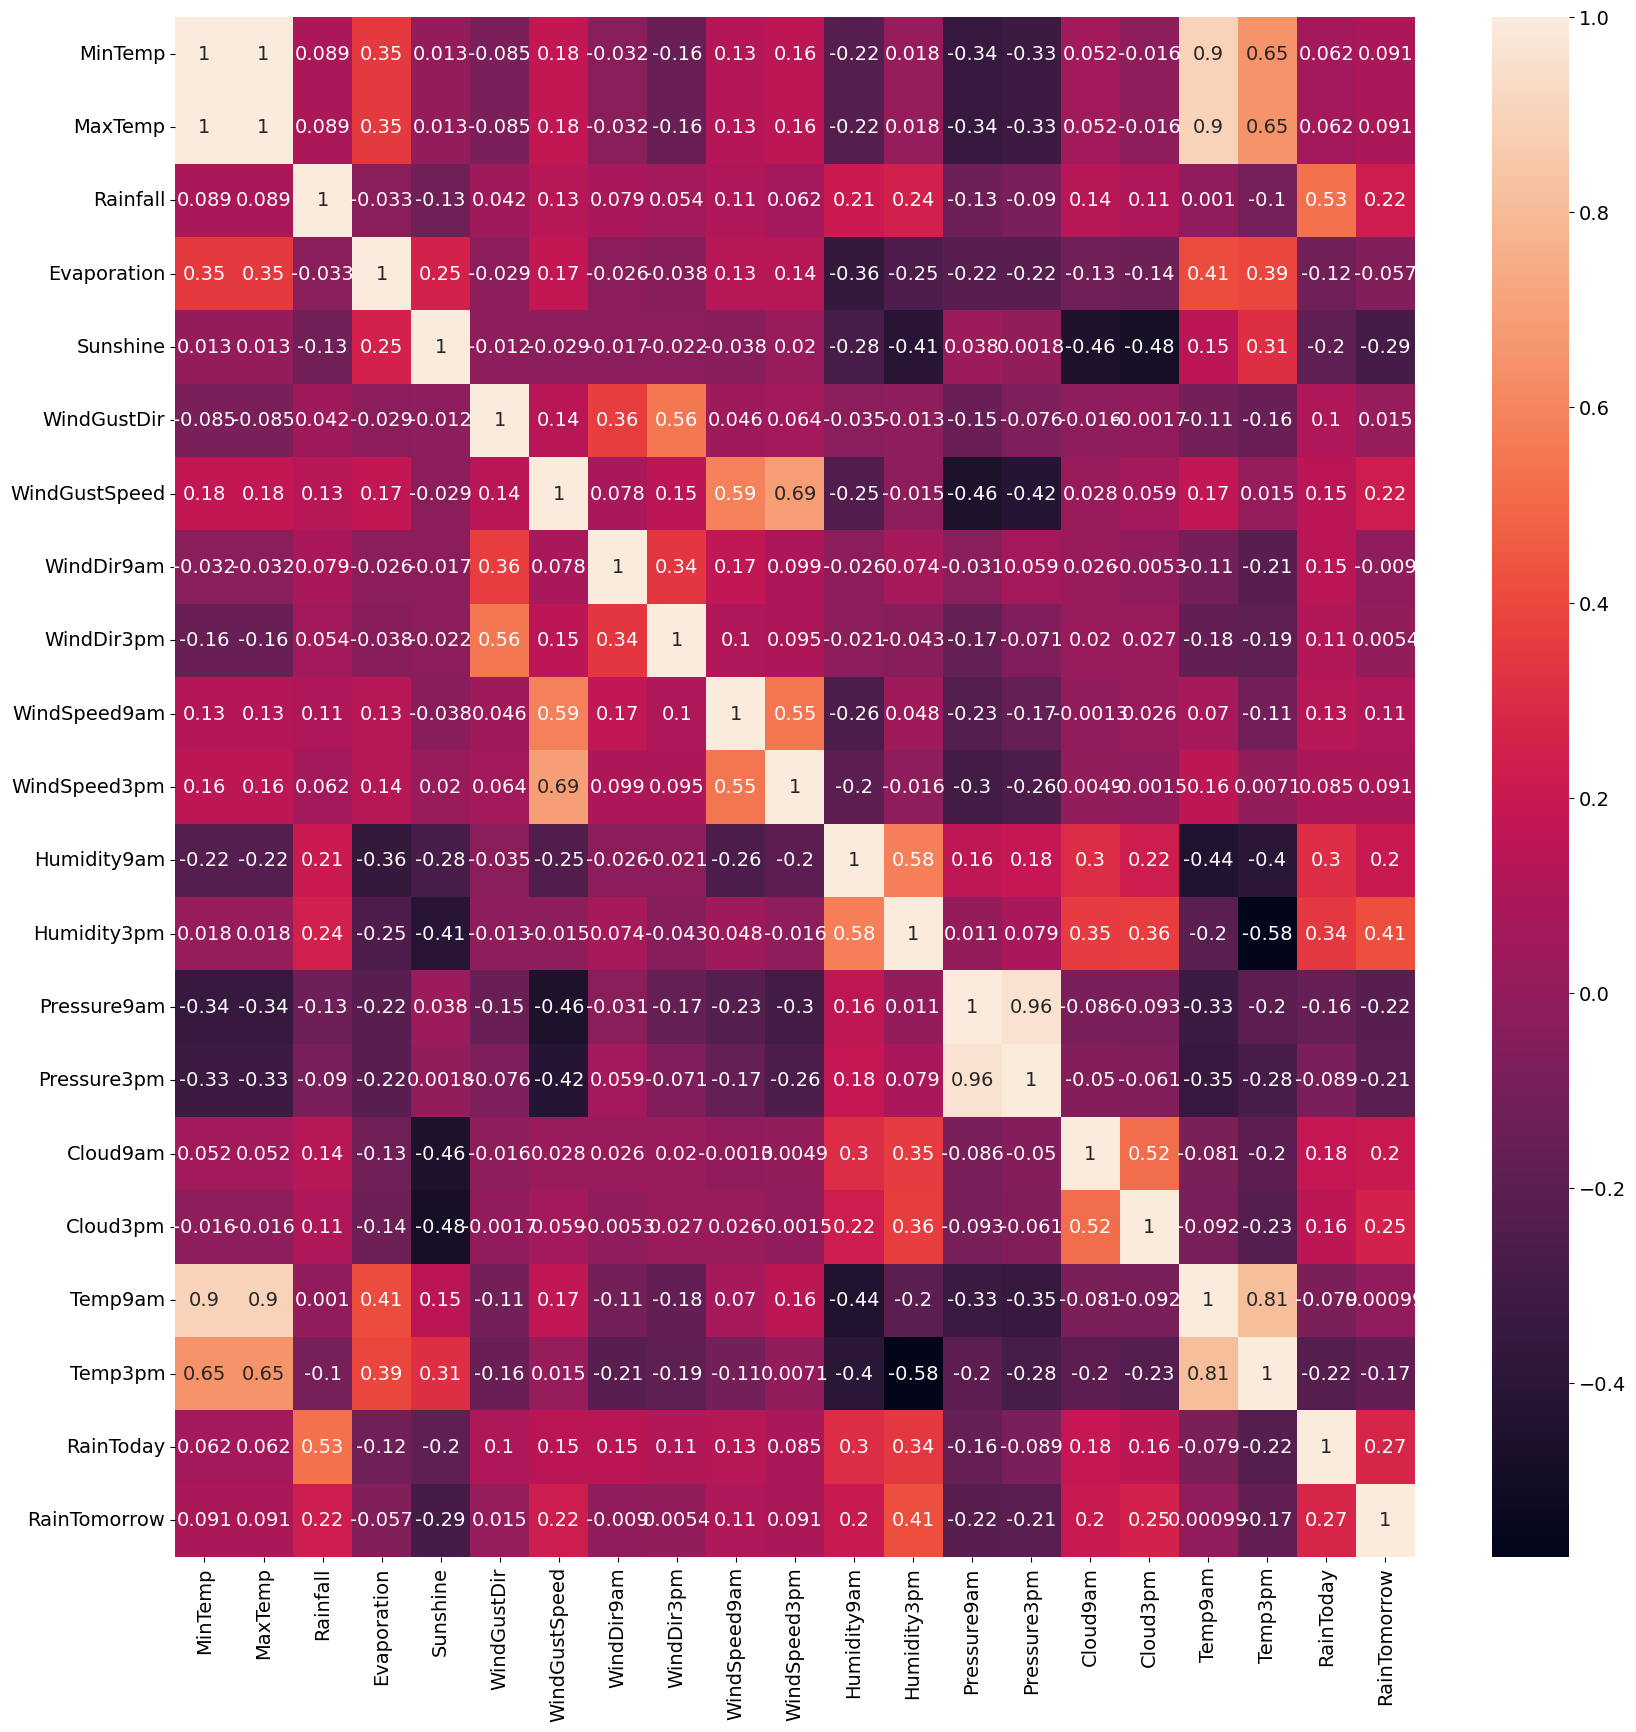

In [45]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

This heatmap is used to identify patterns and relationships between variables, such as which variables are positively or negatively correlated, or which variables have similar values.

In [46]:
# Grouping the dataframe by location and find out the averages of all the numeric values.

A=df.groupby('Location').mean()
cm = sns.light_palette("violet", as_cmap=True)
A.style.background_gradient(cmap=cm).format(precision=2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Ballarat,7.37,7.37,1.73,4.00,7.60,8.24,44.92,7.23,8.44,19.96,22.76,81.76,59.02,1017.85,1016.27,5.83,6.19,11.69,16.79,0.26,0.26
Bendigo,8.60,8.60,1.62,3.94,7.60,8.97,38.85,7.49,8.40,12.94,17.16,70.55,46.48,1018.03,1015.87,4.91,5.15,13.85,20.25,0.18,0.18
Brisbane,15.56,15.56,2.91,5.16,8.38,6.37,31.88,9.15,5.33,9.21,13.74,62.11,51.63,1017.95,1014.72,3.67,3.62,21.27,24.38,0.22,0.22
Canberra,6.83,6.83,1.73,4.21,7.51,7.27,39.96,6.59,7.87,10.58,19.12,73.22,45.86,1018.94,1016.22,5.22,5.23,12.69,19.47,0.18,0.18
Dartmoor,8.67,8.67,2.10,3.50,6.66,8.64,38.90,6.00,8.88,10.87,17.97,84.30,61.86,1018.01,1016.50,6.00,6.00,12.64,18.22,0.31,0.31
Melbourne,11.64,11.64,1.43,4.65,6.39,7.93,45.58,7.82,8.24,19.12,22.10,68.38,51.68,1017.72,1015.82,5.54,5.57,14.68,19.37,0.20,0.20
MelbourneAirport,9.97,9.97,1.45,4.64,6.38,7.89,46.88,7.86,8.17,20.28,23.08,70.12,51.18,1018.09,1016.28,5.25,5.26,14.12,18.95,0.22,0.22
Mildura,10.73,10.73,0.94,5.86,8.43,8.90,37.17,7.44,8.85,14.00,16.70,64.11,35.43,1018.77,1016.26,3.46,4.02,15.53,23.43,0.11,0.11
MountGinini,3.80,3.80,3.15,4.00,7.60,9.45,45.49,8.67,9.63,15.78,15.50,76.56,68.16,1018.21,1016.04,6.00,6.00,7.96,11.16,0.27,0.27


This coloured chart shows probability of rainfall Today and Tomorrow in the particular country and intensity of colour gives us infomation about highest and lowest values of factors contributing rainfall

In [47]:
rainfall_by_country = df.groupby('Location')['RainTomorrow'].mean()

# sort the groups by rainfall in descending order and get the top 10

top_10_countries = rainfall_by_country.sort_values(ascending=False).head(10)
TOP = pd.DataFrame(top_10_countries)
TOP = TOP.reset_index()

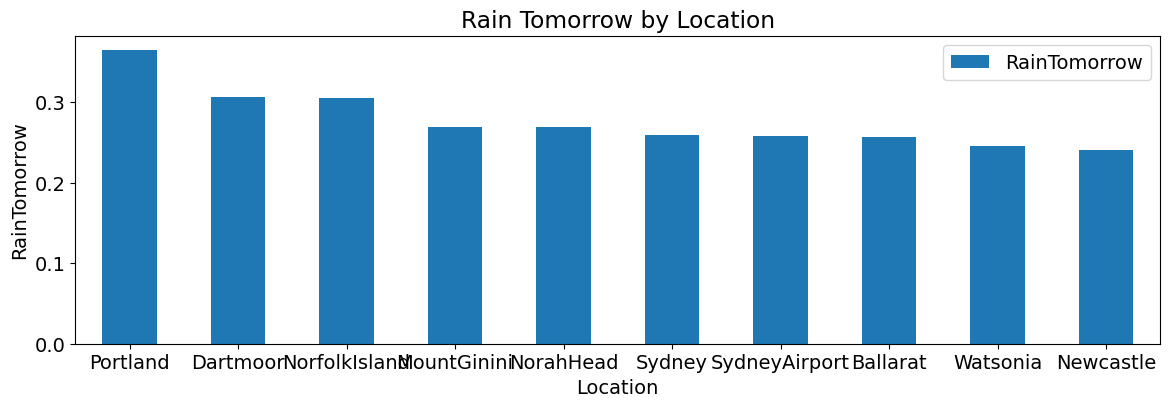

In [48]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(111)
TOP.plot.bar(x='Location', y='RainTomorrow', rot=0,ax=ax)
plt.xlabel('Location')
plt.ylabel('RainTomorrow')
plt.title('Rain Tomorrow by Location')
plt.show()

This bar graph gives information about Top 10 cities with highest Rainfall along with the probability of rainfall.

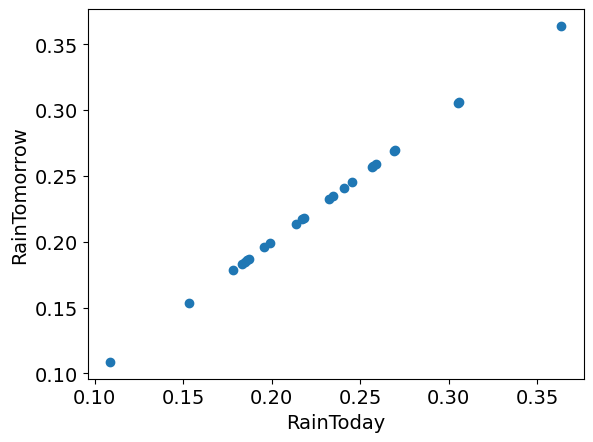

In [49]:
corr = A['RainToday'].corr(A['RainTomorrow'])
plt.scatter(A['RainToday'], A['RainTomorrow'])
plt.xlabel('RainToday')
plt.ylabel('RainTomorrow')
plt.show()

This scatter plot shows the relationship between Rainfall occuring today and probabilty rainfall tomorrow.

Text(0, 0.5, 'Maximum Temperature (C)')

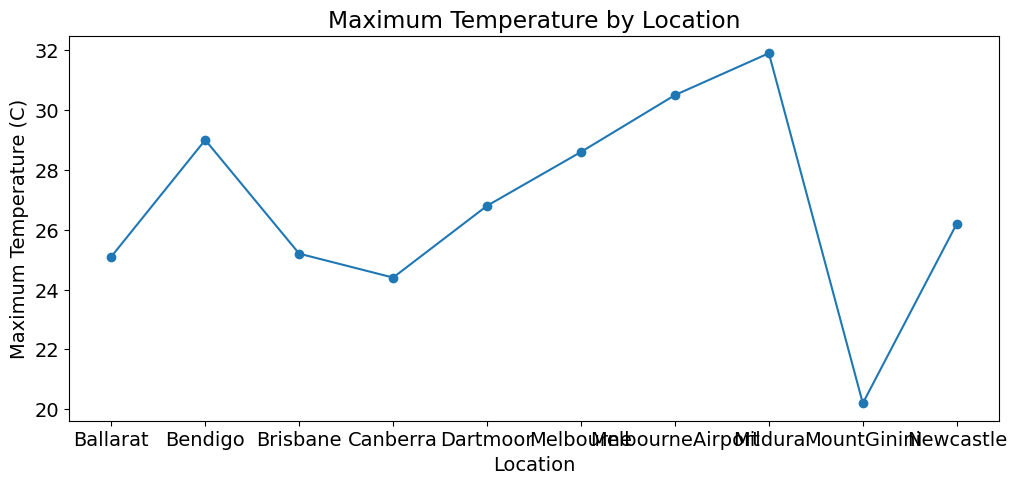

In [50]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size': 14})
grouped_data = df.groupby('Location')['MaxTemp'].max().reset_index()
sorted_data = grouped_data.sort_values('Location').head(10)

plt.plot(sorted_data['Location'], sorted_data['MaxTemp'], marker='o')
plt.title('Maximum Temperature by Location')
plt.xlabel('Location')
plt.ylabel('Maximum Temperature (C)')



This chart gives information about Cities with Maximum Temperature and the count of temperature like Ballarat has temperature around 25 C

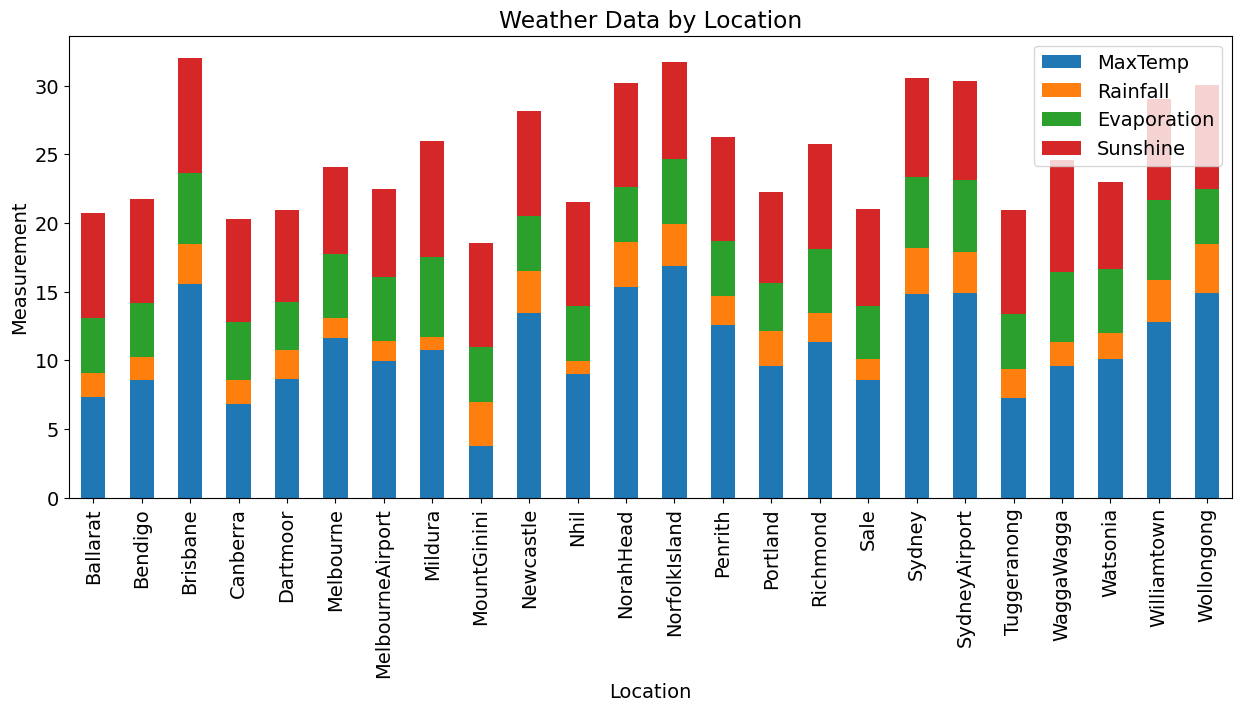

In [51]:
columns = [ "MaxTemp", "Rainfall", "Evaporation", "Sunshine"]
# Create a stacked column chart
A[columns].plot(kind="bar", stacked=True,figsize=(15, 6))
plt.legend(loc='upper right')

plt.title("Weather Data by Location")
plt.xlabel("Location")
plt.ylabel("Measurement")
plt.show()

This stacked chart is used to display the composition of a attributes.Here the data is represented by a set of bars or columns that are stacked on top of each other, with each segment of the bar or column representing a different category or sub-category that are Temperature , Rainfall, Evaporation and Sunshine

# Splitting Dataset for Training and Testing

In [52]:
#Dropping location as it may introduce bias

X = df.drop(["Location"], axis=1)
X = X.drop(["RainTomorrow"], axis=1)
X = X.head(10000)
Y = df["RainTomorrow"]
Y = Y.head(10000)

In [53]:
#input 
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,10.881979,10.881979,0.0,4.0,7.6,13,39.0,3,4,13.0,19.0,73.063805,59.00000,1018.210231,1016.041465,6.0,0.0,15.148334,25.400000,0
1,16.200000,16.200000,0.0,4.0,7.6,13,39.0,3,9,2.0,2.0,74.000000,26.00000,1018.210231,1016.041465,4.0,4.0,22.200000,32.000000,0
2,19.200000,19.200000,0.0,4.0,7.6,13,39.0,9,9,22.0,22.0,66.000000,61.00000,1018.210231,1016.041465,7.0,5.0,20.400000,23.000000,0
3,18.800000,18.800000,0.0,4.0,7.6,13,39.0,4,8,4.0,19.0,85.000000,54.42282,1018.210231,1016.041465,8.0,6.0,20.000000,19.986988,0
4,19.800000,19.800000,0.0,4.0,7.6,13,39.0,7,7,4.0,7.0,56.000000,39.00000,1018.210231,1016.041465,6.0,7.0,29.200000,31.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.000000,8.000000,0.0,4.0,7.6,5,15.0,3,3,0.0,11.0,98.000000,44.00000,1018.210231,1016.041465,6.0,6.0,10.700000,24.000000,0
9996,5.800000,5.800000,0.0,4.0,7.6,4,30.0,3,6,0.0,7.0,97.000000,35.00000,1018.210231,1016.041465,6.0,6.0,11.000000,25.600000,0
9997,6.100000,6.100000,0.0,4.0,7.6,3,28.0,3,7,0.0,11.0,89.000000,30.00000,1018.210231,1016.041465,6.0,6.0,10.800000,24.600000,0
9998,5.800000,5.800000,0.0,4.0,7.6,8,24.0,3,12,0.0,6.0,74.000000,51.00000,1018.210231,1016.041465,6.0,6.0,12.000000,22.000000,0


In [54]:
#Target
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: RainTomorrow, Length: 10000, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Spliting data into training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, random_state = 0)

# Training the Classifiers without Hyper parameters

# Naive Bayes

Naive Bayes assumes that the features are independent of each other, which may not be the case in reality. In addition, Naive Bayes may not be the most accurate algorithm for this type of prediction, 

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
model = GaussianNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("The accuracy score is : ",accuracy_score(y_test, y_pred))

The accuracy score is :  0.7595


# Support Vector Machine

The algorithm would then find the optimal hyperplane that separates the data points into two classes: rainy and non-rainy. Given a new set of input features, SVM can predict whether it will rain or not by determining which side of the hyperplane the input data point lies on.

In [58]:
from sklearn.svm import SVC
svc=SVC() 

svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.805


# Hyperparameters For SVM

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,0.2,0.5],
            'gamma':[1,0.5,00.001]} 

In [60]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.2, 0.5], 'gamma': [1, 0.5, 0.001]},
             verbose=3)

In [61]:
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'C': 1, 'gamma': 0.001}


In [62]:
svc_model=SVC(C=1, gamma=0.001)
svc_model.fit(X_train,y_train)

SVC(C=1, gamma=0.001)

In [63]:
y_pred = svc.predict(X_test)

In [64]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

print("Training Score: ", svc_model.score(X_train,y_train))
print("Testing Score: ", svc_model.score(X_test,y_test))

The accuracy score is :  0.805
Training Score:  0.796625
Testing Score:  0.795


<AxesSubplot:>

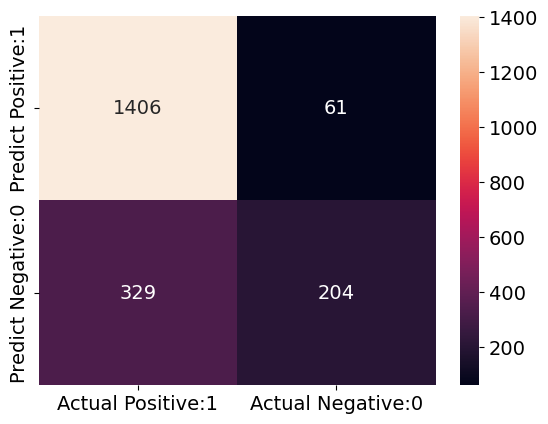

In [65]:
#CONFUSION MATRIX

from sklearn.metrics import accuracy_score, confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.0f')


In [66]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]
Accuracy_1 = (TP + TN) / (TP +FP + FN + TN)
Precision_1 = TP/(TP+FP)
Recall_1 = TP/(TP+FN)
F1_Score_1 = 2*(Recall_1 * Precision_1) / (Recall_1 + Precision_1)
print('Accuracy  :',Accuracy_1)
print('Precision :',Precision_1)
print('Recall    :',Recall_1)
print('F1_Score  :',F1_Score_1)

Accuracy  : 0.805
Precision : 0.9584185412406271
Recall    : 0.8103746397694525
F1_Score  : 0.8782011242973142


# KNN

Given a new set of input features, KNN can predict the rainfall amount by finding the K-nearest neighbors in the training data and using their average rainfall amount as the predicted value.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7735


# Hyperparameters For KNN

In [68]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [69]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [70]:
gridsearch.fit(X_train,y_train) #High Computation

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.758 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.769 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.768 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.771 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.765 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.778 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.776 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.789 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.782 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.774 total 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [71]:
# let's see the  best parameters according to gridsearch

print("Best hyperparameters: ", gridsearch.best_params_)

Best hyperparameters:  {'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}


In [72]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =13)

knn_1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [73]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

print("Training Score: ", knn_1.score(X_train,y_train))
print("Testing Score: ", knn_1.score(X_test,y_test))


The accuracy score is :  0.7735
Training Score:  0.813375
Testing Score:  0.791


In [74]:
y_pred =knn_1.predict(X_test)

<AxesSubplot:>

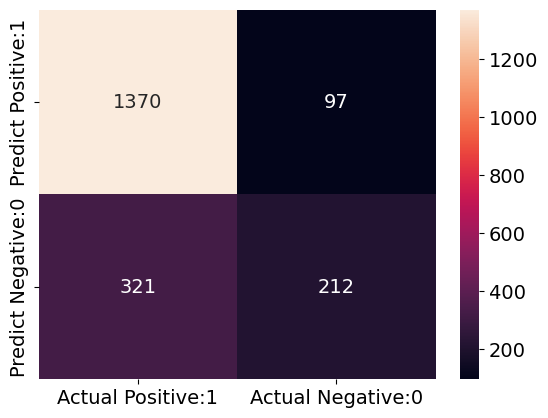

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True,fmt='.0f')

In [76]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]
Accuracy_2 = (TP + TN) / (TP +FP + FN + TN)
Precision_2 = TP/(TP+FP)
Recall_2 = TP/(TP+FN)
F1_Score_2 = 2*(Recall_2 * Precision_2) / (Recall_2 + Precision_2)
print('Accuracy  :',Accuracy_2)
print('Precision :',Precision_2)
print('Recall    :',Recall_2)
print('F1_Score  :',F1_Score_2)

Accuracy  : 0.791
Precision : 0.9338786639400136
Recall    : 0.8101714961561206
F1_Score  : 0.8676377454084864


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.806


In [82]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [0,1,2,3],
    'min_samples_leaf' :[0,1,2,3] ,
    'min_samples_split': [0,1,2,3],
    'max_features' : ['auto','log2']
}

In [83]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [84]:
grid_search.fit(X_train,y_train) #Expensive computation 

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [0, 1, 2, 3],
                         'min_samples_split': [0, 1, 2, 3],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [85]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [86]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_depth = 3,
 max_features = 'auto',
 min_samples_leaf = 3,
 min_samples_split= 2,
 n_estimators = 90,random_state=6)

In [87]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=90,
                       random_state=6)

In [88]:
y_pred = rand_clf.predict(X_test)

In [89]:
print("The accuracy score is : ",accuracy_score(y_test, y_pred))

The accuracy score is :  0.782


<AxesSubplot:>

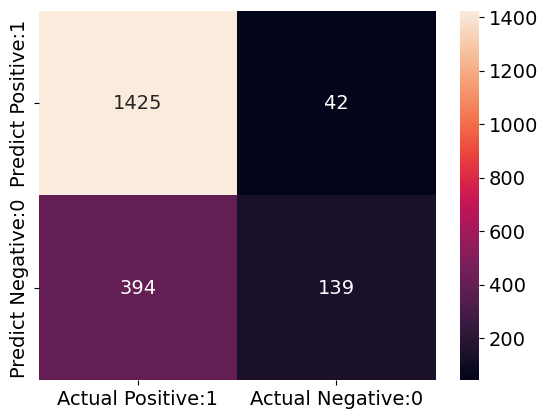

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True,fmt='.0f')

In [91]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]
Accuracy_3 = (TP + TN) / (TP +FP + FN + TN)
Precision_3 = TP/(TP+FP)
Recall_3 = TP/(TP+FN)
F1_Score_3 = 2*(Recall_3 * Precision_3) / (Recall_3 + Precision_3)
print('Accuracy  :',Accuracy_3)
print('Precision :',Precision_3)
print('Recall    :',Recall_3)
print('F1_Score  :',F1_Score_3)

Accuracy  : 0.782
Precision : 0.9713701431492843
Recall    : 0.7833974711379879
F1_Score  : 0.8673158855751673


# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.719


# Hyperparameters For Decision Tree

In [96]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [97]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)


In [98]:
grid_search.fit(X_train,y_train) #high computation

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [99]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'random'}


In [103]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =6, min_samples_leaf= 4, min_samples_split= 6, splitter ='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

In [104]:
y_pred = clf.predict(X_test)

In [105]:
print("Training Score: ", clf.score(X_train,y_train))
print("Testing Score: ", clf.score(X_test,y_test))
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

Training Score:  0.8005
Testing Score:  0.788
The accuracy score is :  0.788


# Comparison

In [92]:
models = ['Support Vector Machine', 'K Nearest Neighbour', 'Random Forest']
accuracy =[Accuracy_1,Accuracy_2,Accuracy_3]
precision = [Precision_1,Precision_2,Precision_3]
recall = [Recall_1,Recall_2,Recall_3]
f1_score = [F1_Score_1,F1_Score_2,F1_Score_3]


In [93]:
Metrics=pd.DataFrame({"Model":models,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1_Score":f1_score})
Metrics

,Model,Accuracy,Precision,Recall,F1_Score
0,Support Vector Machine,0.805,0.958419,0.810375,0.878201
1,K Nearest Neighbour,0.791,0.933879,0.810171,0.867638
2,Random Forest,0.782,0.971370,0.783397,0.867316


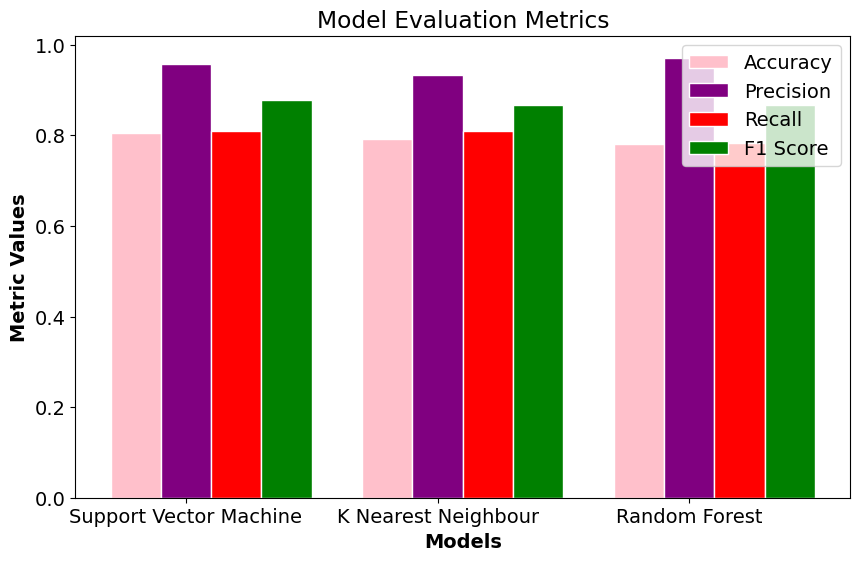

In [94]:
# Set the width of the bars
barWidth = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the bars for each metric
fig, ax = plt.subplots(figsize=(10,6)) # set the figure size

ax.bar(r1, accuracy, color='pink', width=barWidth, edgecolor='white', label='Accuracy')
ax.bar(r2, precision, color='purple', width=barWidth, edgecolor='white', label='Precision')
ax.bar(r3, recall, color='red', width=barWidth, edgecolor='white', label='Recall')
ax.bar(r4, f1_score, color='green', width=barWidth, edgecolor='white', label='F1 Score')

# Add xticks on the middle of the group bars
ax.set_xlabel('Models', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(accuracy))])
ax.set_xticklabels(models)

ax.set_ylabel('Metric Values', fontweight='bold')
ax.set_title('Model Evaluation Metrics')
ax.legend()
plt.show()


# Conclusion


High false negative rate in the confusion matrix is considered to be the worst parameter for rain prediction. It indicates that the model is failing to identify a significant number of rainy days, which can have serious consequences in certain situations.So here we will consider Recall.A high recall value indicates that the model is effective at correctly identifying rainy days, and thus has a low false negative rate.

In summary, to improve rain prediction, it is important to focus on achieving a high recall value, which will reduce the number of false negatives and improve the accuracy of the model in identifying rainy days.So here Support Vector Machine has highest Recall so it is considered to best Algorithm for Rainfall prediction